<a href="https://colab.research.google.com/github/Jlburns23/Finance/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Justin Burns**
# **02/12/2021**

# **Capstone 3 - Wine Data Analysis**

---



https://drive.google.com/file/d/12EaHR2q19Q9a3H1yf3LySKVRd_XJFgzP/view?usp=sharing

In [ ]:
!ls /content/

gdrive	sample_data


In [ ]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statistics

The data sets were fairly small so i combined the 2 sets of data(White wine and Red wine). I created a column to differentiate the 2.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/winequality-all.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine type             6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,W,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,W,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,W,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,W,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,W,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: ylabel='Frequency'>

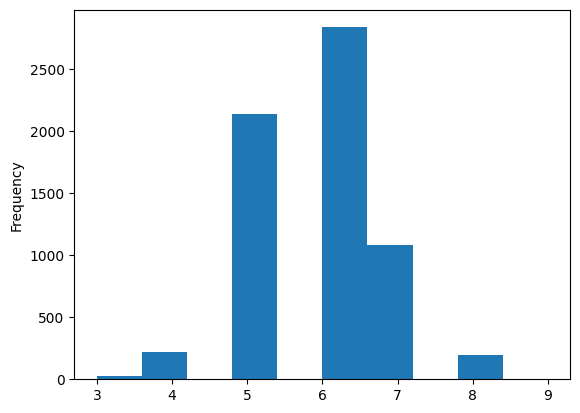

In [ ]:
df['quality'].plot(kind='hist')

Not much cleaning to do due to no Null values. Will take the spaces out of the column names.

In [ ]:
df.rename(columns={'wine type':'wine_type', 'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity','citric acid':'citric_acid', 'residual sugar':'residual_sugar',
                   'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},inplace = True)

In [ ]:
df.head()

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,W,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,W,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,W,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,W,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,W,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


After analyizing the correlation matrix i see that Alcohohl and Density have a notable relationship

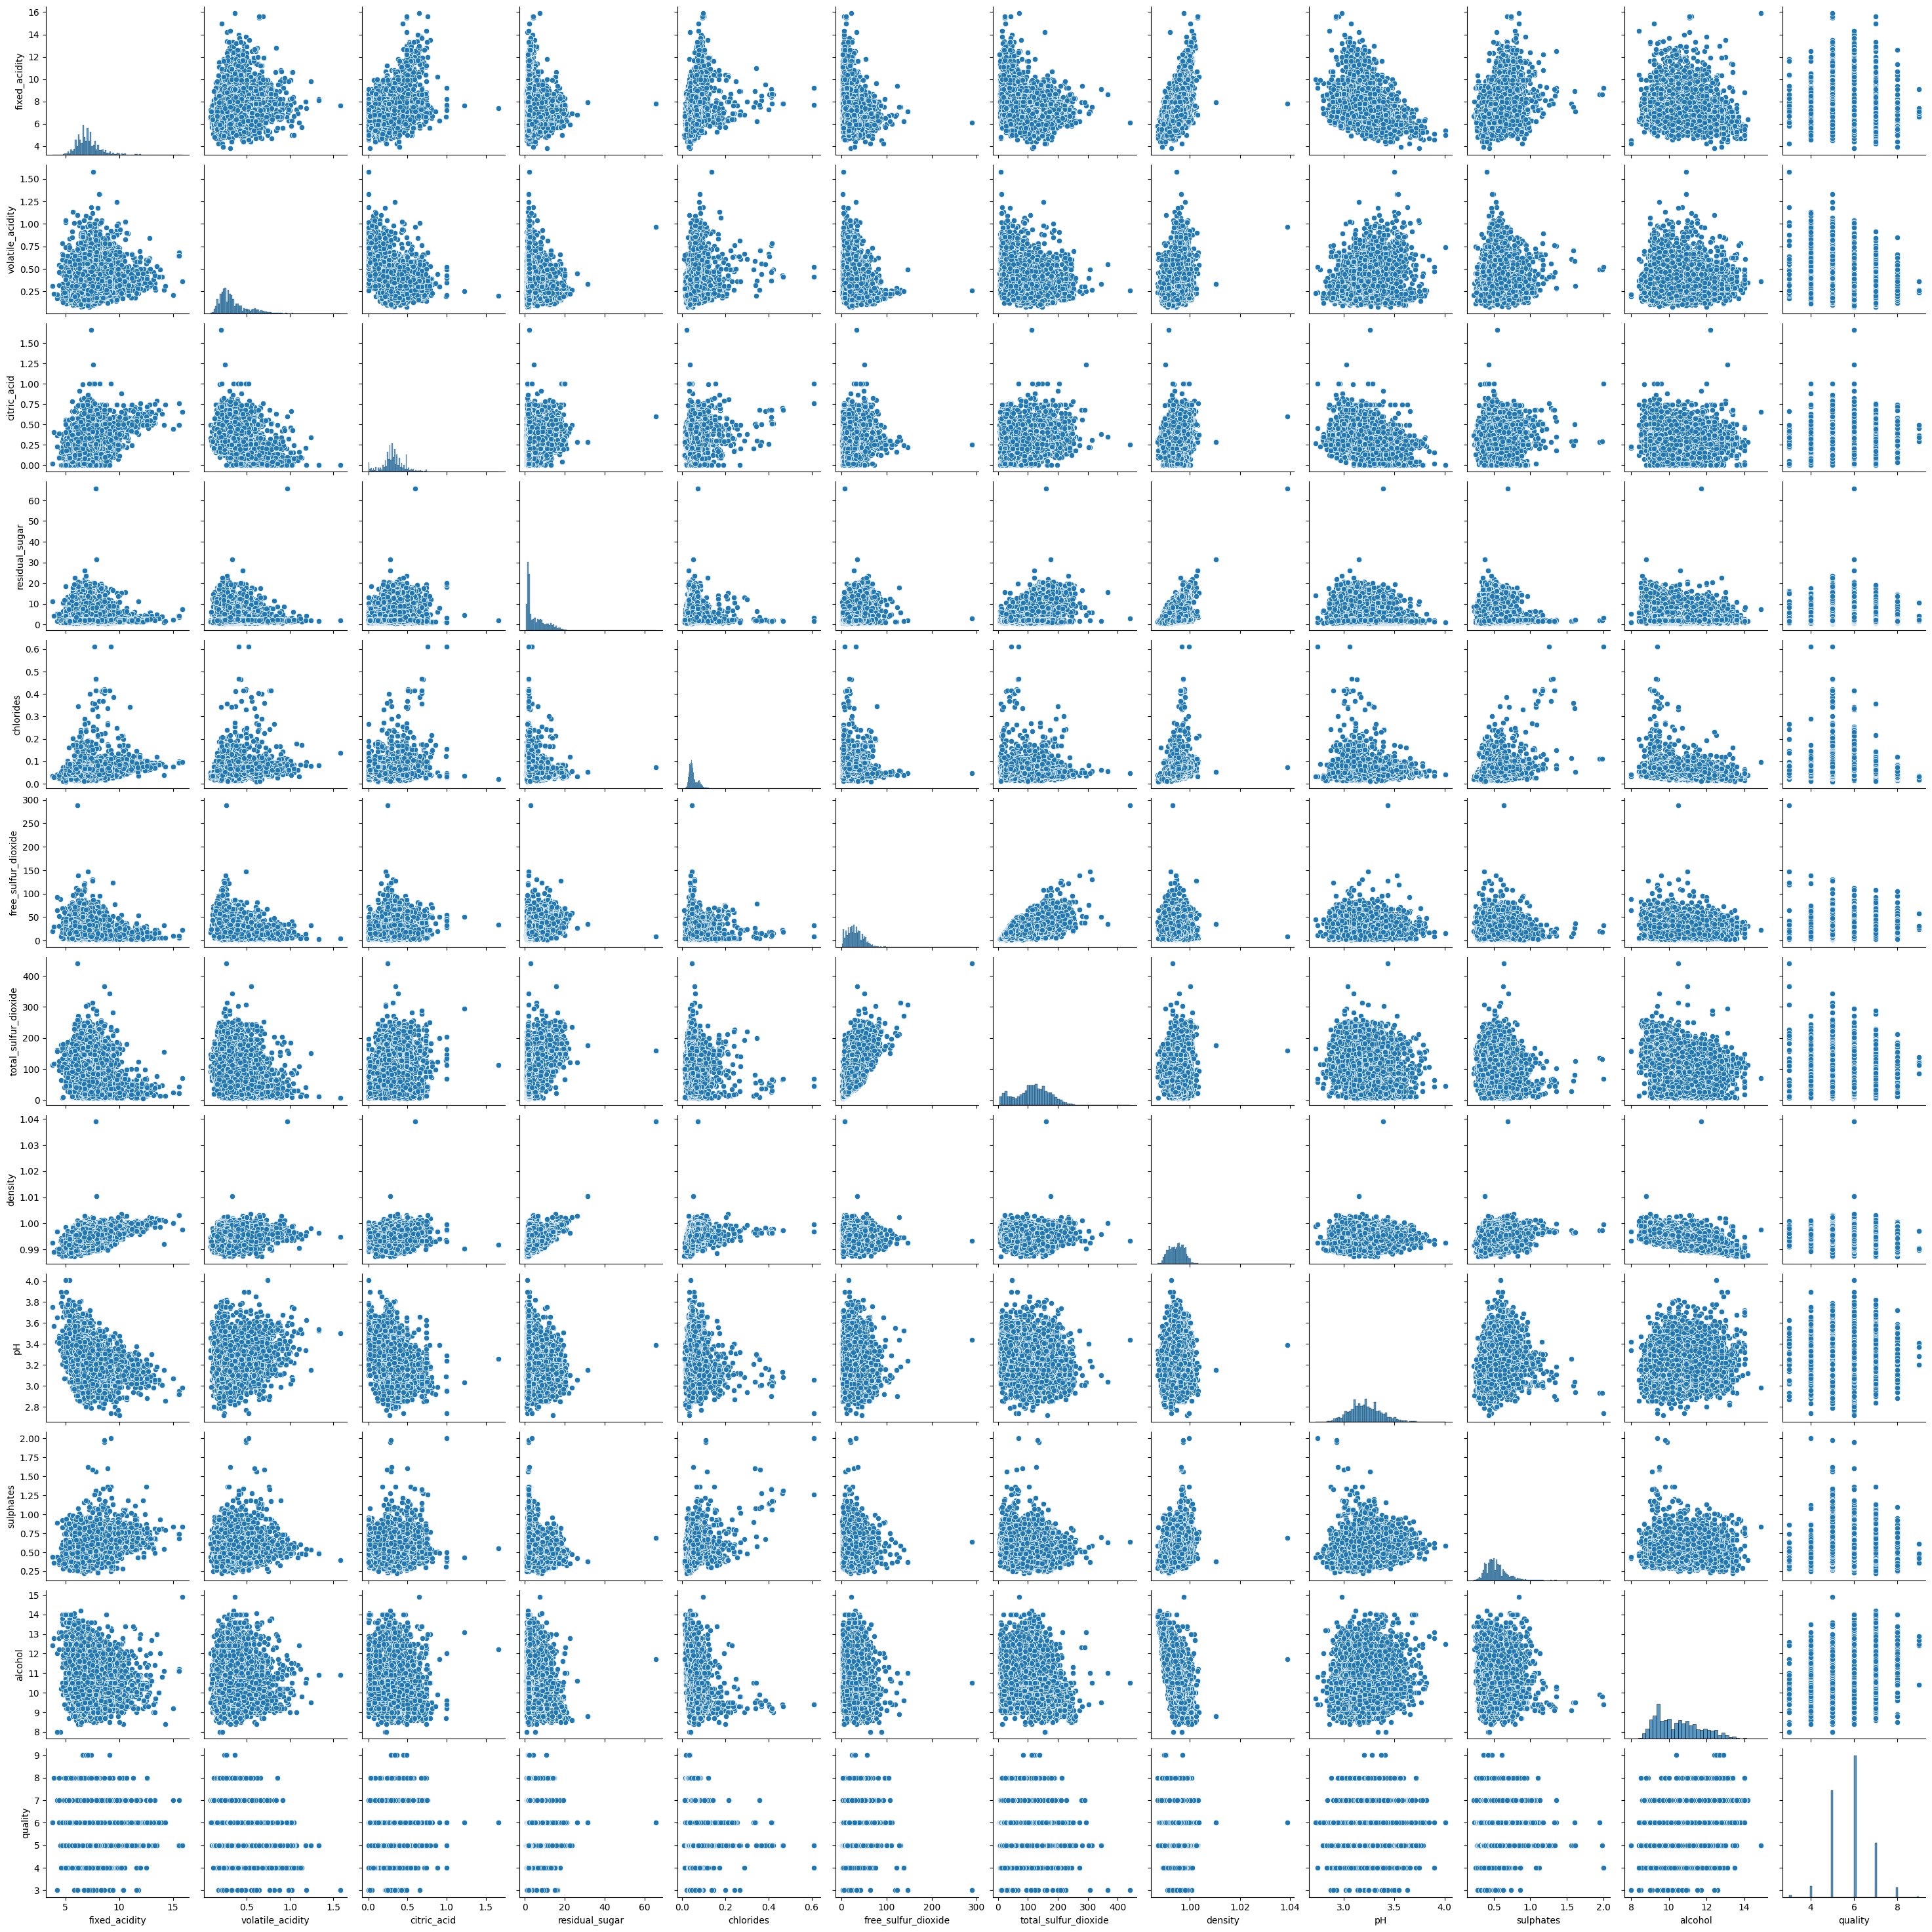

In [ ]:
sns.pairplot(df)

Whats the correlation between density and alcohol?

<Axes: xlabel='density', ylabel='alcohol'>

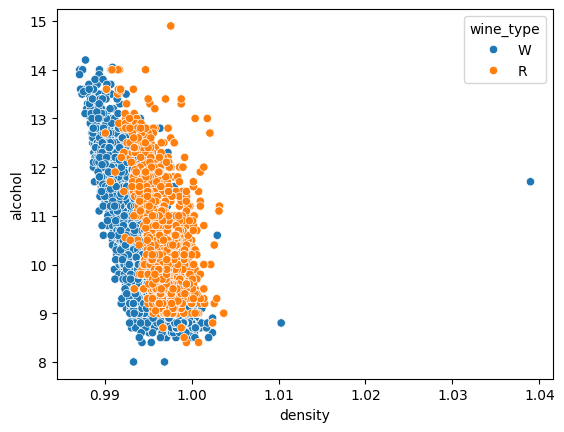

In [ ]:
sns.scatterplot(x = df['density'], y = df['alcohol'], hue = df['wine_type'], )

For most wines, the lower the alcohol the more dense the wine is.

## **Conduct Pearsonr test**

In [ ]:
stats.pearsonr(df.density, df.alcohol)

PearsonRResult(statistic=-0.6867454216813399, pvalue=0.0)

A high negative correlation means when one variable gets greater the other decreases.
A statically significant correlation based off P-value being less than .05

<Axes: xlabel='pH', ylabel='alcohol'>

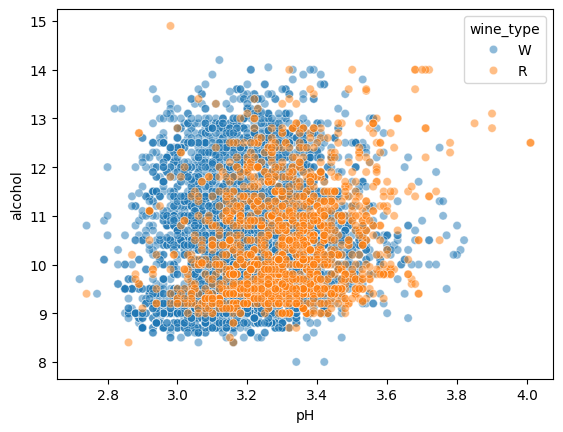

In [ ]:
sns.scatterplot(x = df['pH'], y = df['alcohol'], hue = df['wine_type'], alpha = .5 )

Lets take a look at the relationship between fixed acidity and density.

<Axes: xlabel='fixed_acidity', ylabel='density'>

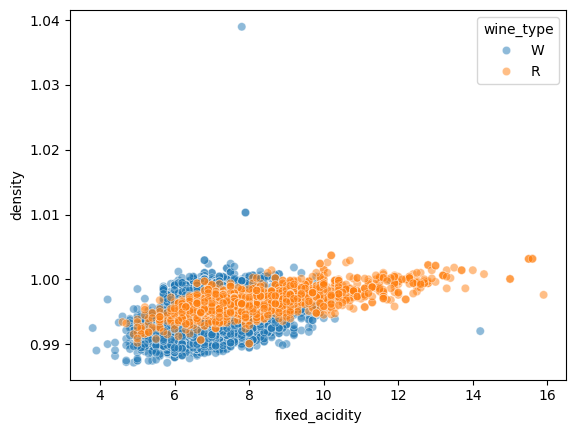

In [ ]:
sns.scatterplot(x = df['fixed_acidity'], y = df['density'], hue = df['wine_type'], alpha = .5 )

For most Red wines, the higher the fixed acidity the higher the density.

Conduct Pearsonr

In [ ]:
stats.pearsonr(df.fixed_acidity, df.density)

PearsonRResult(statistic=0.4589099822804343, pvalue=0.0)

A moderate positive correlation, when one value increases so does the other.
A statically significant correlation based off P-value being less than .05

What quality rating has the most wines?

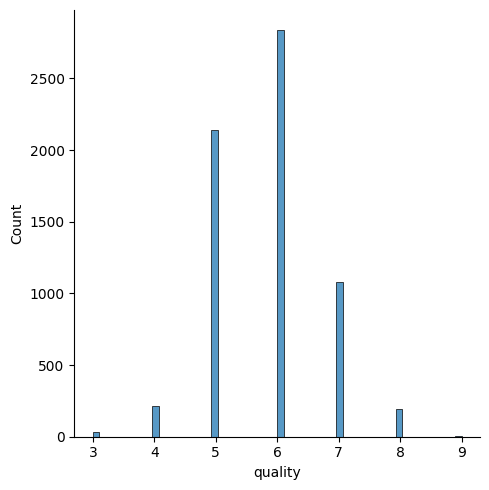

In [ ]:
sns.displot(df.quality)

Quality rating of 6 has the most wines.

<Axes: xlabel='quality', ylabel='alcohol'>

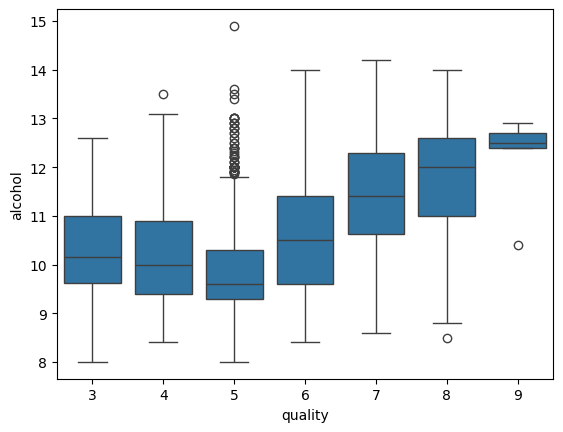

In [ ]:
sns.boxplot(x = df['quality'], y = df['alcohol'], )

Wines rated 6 - 9 have an average Alcohol volume in the range of 10.5 - 13
Wines less than 6 have a Alocohol volume less than 10.5

<Axes: xlabel='quality', ylabel='residual_sugar'>

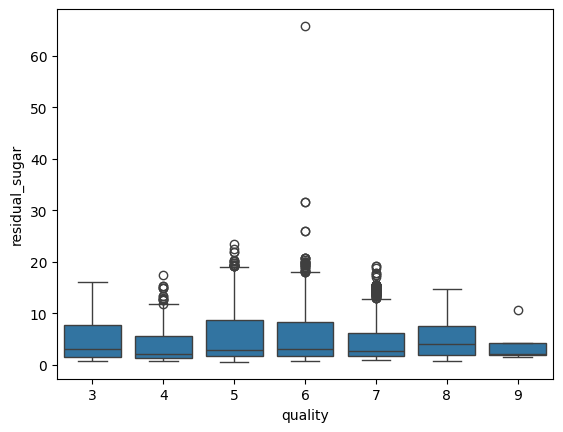

In [ ]:
sns.boxplot(x = df['quality'], y = df['residual_sugar'], )

# On average does Red or White wine have a higher quality rating?

In [ ]:
red_wine = df.wine_type == 'R'
white_wine = df.wine_type == 'W'

In [ ]:
RW = df[red_wine]

RW

# RW.quality.mean()

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4898,R,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,R,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,R,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,R,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,R,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,R,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,R,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,R,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,R,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
WW = df[white_wine]

WW

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,W,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,W,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,W,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,W,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,W,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,W,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,W,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,W,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,W,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
##Average red wine quality rating
RW.quality.mean()

5.6360225140712945

In [ ]:
##Average white wine quality rating
WW.quality.mean()

5.87790935075541

White wine(5.88) has a higher average quality than red wine(5.64)

# **Null hypotheses is there will be no difference in average quality in red and white wines.**
# **Alternative hypotheses is there will be a difference in average quality in red and white wines.**


In [ ]:
stats.ttest_ind(RW.quality, WW.quality)

TtestResult(statistic=-9.685649554187696, pvalue=4.888069044201508e-22, df=6495.0)

The T-test shows there is a significant difference in quality rating between White and Red wines.
With a P-Value less than .05 i can reject my null hypotheses

# Is there a relationship between sugar and alcohol and quality?

wanted to round out the values so i wouldnt get the long decimal numbers. make sit a lot easier to read and analyze.

In [ ]:
df_rounded = df.round(0)
df_rounded.head()

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,W,7.0,0.0,0.0,21.0,0.0,45.0,170.0,1.0,3.0,0.0,9.0,6
1,W,6.0,0.0,0.0,2.0,0.0,14.0,132.0,1.0,3.0,0.0,10.0,6
2,W,8.0,0.0,0.0,7.0,0.0,30.0,97.0,1.0,3.0,0.0,10.0,6
3,W,7.0,0.0,0.0,8.0,0.0,47.0,186.0,1.0,3.0,0.0,10.0,6
4,W,7.0,0.0,0.0,8.0,0.0,47.0,186.0,1.0,3.0,0.0,10.0,6


In [ ]:
df_rounded.corr()

<ipython-input-48-c1340b052efe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rounded.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.167568,0.265661,-0.112021,0.016938,-0.282073,-0.326506,NaN,-0.157431,0.231484,-0.087060,-0.081180
volatile_acidity,0.167568,1.000000,-0.050067,-0.207423,0.016852,-0.301650,-0.395562,NaN,0.178878,0.238399,-0.074883,-0.213429
citric_acid,0.265661,-0.050067,1.000000,0.067927,0.060316,-0.001521,-0.013345,NaN,-0.036866,0.061800,-0.095830,-0.047485
residual_sugar,-0.112021,-0.207423,0.067927,1.000000,-0.010826,0.402314,0.494456,NaN,-0.118088,-0.188348,-0.339474,-0.037150
chlorides,0.016938,0.016852,0.060316,-0.010826,1.000000,-0.010407,-0.018240,NaN,-0.004111,0.034762,-0.021477,-0.026495
free_sulfur_dioxide,-0.282073,-0.301650,-0.001521,0.402314,-0.010407,1.000000,0.720919,NaN,-0.069104,-0.194219,-0.173702,0.055478
total_sulfur_dioxide,-0.326506,-0.395562,-0.013345,0.494456,-0.018240,0.720919,1.000000,NaN,-0.112769,-0.251645,-0.258779,-0.041397
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,-0.157431,0.178878,-0.036866,-0.118088,-0.004111,-0.069104,-0.112769,NaN,1.000000,0.112306,0.068736,-0.026679
sulphates,0.231484,0.238399,0.061800,-0.188348,0.034762,-0.194219,-0.251645,NaN,0.112306,1.000000,0.009782,0.014573


replace NaN with a value of 0 using Fill_value.

<Axes: xlabel='alcohol', ylabel='quality'>

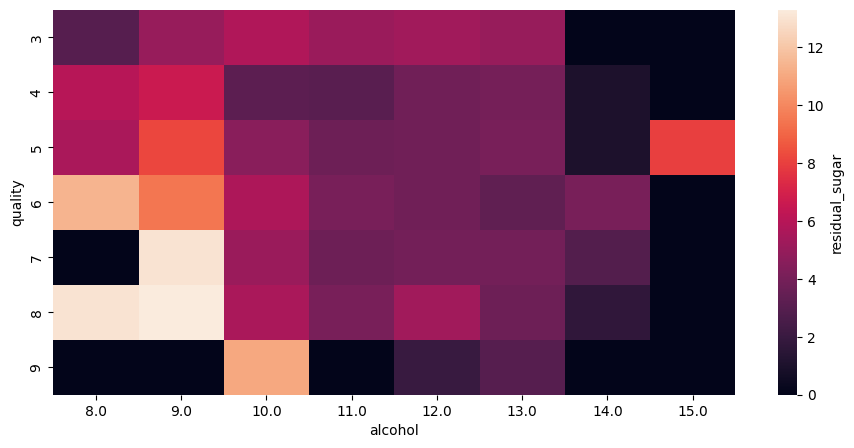

In [ ]:

heat_map = df_rounded.pivot_table("residual_sugar","quality","alcohol",fill_value=0).round(1)
plt.figure(figsize = (11,5))
sns.heatmap(heat_map, cbar_kws= {"label":"residual_sugar"})

# **Summary of findings**


Low alcohol content and high sugar has higher ratings amongst red and white wines.

I've come to conclusion that wine stores should suggest wines higher in sugar with lower alcohol to customeres for they are the highest rated wines.

Also white wines have the higher ratings than red wines so for someone who is open to either option i would recommned white wine.